Let's import our cleaned data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df=pd.read_csv('cleaned_data.csv')
df=df.drop('Unnamed: 0',axis=1)

Next, I'll designate my features and split them into training and testing data.

In [2]:
X=df.drop('fraud',axis=1)
y=df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

A quick Google search showed that Catboost is a reliable model for fradulent credit transactions. I'll go through the process of training the model and checking its performance.

In [3]:
import catboost as cb
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')

In [4]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

In [5]:
grid = {'learning_rate': [0.03],
'depth': [4],
'l2_leaf_reg': [1],
'iterations': [50]}
model.grid_search(grid,train_dataset)

0:	learn: 0.9812170	test: 0.9819124	best: 0.9819124 (0)	total: 207ms	remaining: 10.2s
1:	learn: 0.9812170	test: 0.9819124	best: 0.9819124 (0)	total: 256ms	remaining: 6.14s
2:	learn: 0.9812170	test: 0.9819124	best: 0.9819124 (0)	total: 304ms	remaining: 4.76s
3:	learn: 0.9896530	test: 0.9899937	best: 0.9899937 (3)	total: 347ms	remaining: 3.99s
4:	learn: 0.9896530	test: 0.9899999	best: 0.9899999 (4)	total: 389ms	remaining: 3.5s
5:	learn: 0.9896874	test: 0.9900374	best: 0.9900374 (5)	total: 430ms	remaining: 3.15s
6:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 485ms	remaining: 2.98s
7:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 534ms	remaining: 2.81s
8:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 588ms	remaining: 2.68s
9:	learn: 0.9896937	test: 0.9900687	best: 0.9900687 (6)	total: 640ms	remaining: 2.56s
10:	learn: 0.9896983	test: 0.9900749	best: 0.9900749 (10)	total: 697ms	remaining: 2.47s
11:	learn: 0.9897077	test: 0.9900812	best: 0.9900812 

44:	learn: 0.9955787	test: 0.9954025	best: 0.9954025 (44)	total: 2.7s	remaining: 300ms
45:	learn: 0.9955918	test: 0.9954175	best: 0.9954175 (45)	total: 2.77s	remaining: 240ms
46:	learn: 0.9955918	test: 0.9954175	best: 0.9954175 (45)	total: 2.83s	remaining: 181ms
47:	learn: 0.9955768	test: 0.9954025	best: 0.9954175 (45)	total: 2.89s	remaining: 120ms
48:	learn: 0.9955768	test: 0.9954025	best: 0.9954175 (45)	total: 2.95s	remaining: 60.3ms
49:	learn: 0.9955825	test: 0.9954025	best: 0.9954175 (45)	total: 3.01s	remaining: 0us

bestTest = 0.9954174714
bestIteration = 45

Training on fold [1/3]
0:	learn: 0.9802392	test: 0.9804548	best: 0.9804548 (0)	total: 59.1ms	remaining: 2.89s
1:	learn: 0.9820017	test: 0.9821836	best: 0.9821836 (1)	total: 117ms	remaining: 2.82s
2:	learn: 0.9910337	test: 0.9910637	best: 0.9910637 (2)	total: 179ms	remaining: 2.81s
3:	learn: 0.9910637	test: 0.9910824	best: 0.9910824 (3)	total: 236ms	remaining: 2.71s
4:	learn: 0.9910637	test: 0.9910824	best: 0.9910824 (3)	total

40:	learn: 0.9947893	test: 0.9949487	best: 0.9949487 (39)	total: 2.45s	remaining: 539ms
41:	learn: 0.9947893	test: 0.9949487	best: 0.9949487 (39)	total: 2.51s	remaining: 478ms
42:	learn: 0.9947893	test: 0.9949487	best: 0.9949487 (39)	total: 2.57s	remaining: 419ms
43:	learn: 0.9948587	test: 0.9949824	best: 0.9949824 (43)	total: 2.62s	remaining: 358ms
44:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 2.68s	remaining: 298ms
45:	learn: 0.9948587	test: 0.9949824	best: 0.9949824 (43)	total: 2.75s	remaining: 239ms
46:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 2.8s	remaining: 179ms
47:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 2.86s	remaining: 119ms
48:	learn: 0.9948418	test: 0.9949749	best: 0.9949824 (43)	total: 2.92s	remaining: 59.6ms
49:	learn: 0.9949450	test: 0.9951062	best: 0.9951062 (49)	total: 2.98s	remaining: 0us

bestTest = 0.9951062011
bestIteration = 49



{'params': {'depth': 4,
  'l2_leaf_reg': 1,
  'iterations': 50,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

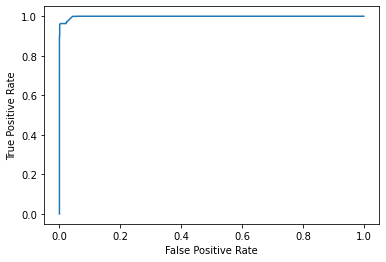

In [6]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

It's nearly 100%. There's no source for the data, so I'm assuming it's synthetic. Let's check the feature importance next.

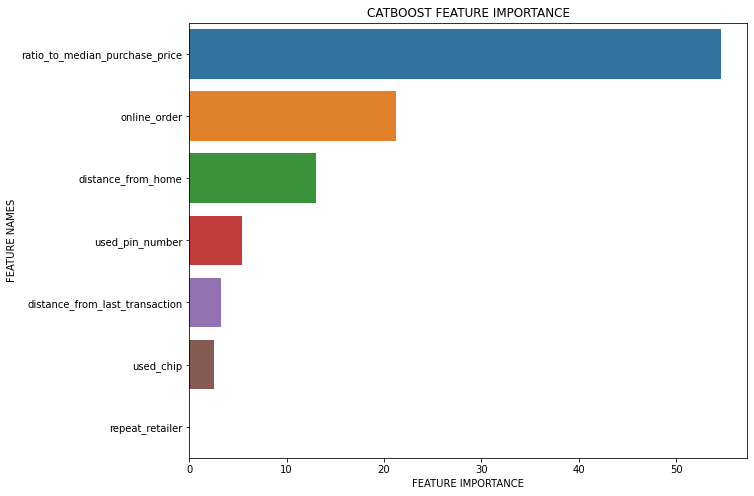

In [7]:
import numpy as np
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.get_feature_importance(),X.columns,'CATBOOST')

The results are pretty cut-and-dry; 'ratio_to_median_purchase_price' correlates the most strongly with fraudulent transactions. I want to see how many instances of fraud there were throughout the data though.

In [8]:
df.groupby('fraud')['used_chip'].describe()

,count,mean,std,min,25%,50%,75%,max
fraud,,,,,,,,
0.0,912591.0,0.359402,0.479825,0.0,0.0,0.0,1.0,1.0
1.0,87401.0,0.256404,0.436650,0.0,0.0,0.0,1.0,1.0


It's extremely imbalanced. Less than 10% of the transactions were fraudulent. 

I'm going to re-weigh the fradulent transactions and check the model again.

In [9]:
from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=(0.0957723668105427))

In [10]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

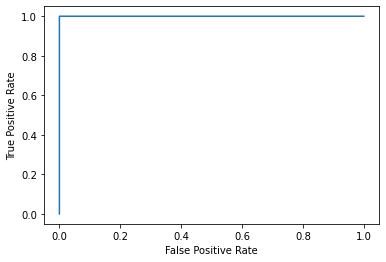

In [11]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC is even more accurate now. Let's see if the feature importance at least changed.

<BarContainer object of 7 artists>

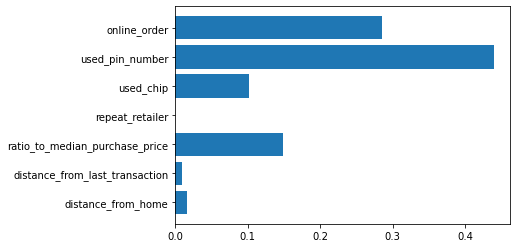

In [12]:
plt.barh(X.columns, model.feature_importances_)

In [ ]:
The model definitely yields different results after the re-weighing. 'used_pin_number' 

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X=df.drop('fraud',axis=1)
y=df['fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)
X_train,y_train = oversample.fit_resample(X_train,y_train)

In [14]:
model = cb.CatBoostClassifier(loss_function='Logloss', eval_metric='Accuracy')
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)
model.grid_search(grid,train_dataset)

0:	learn: 0.9723606	test: 0.9721877	best: 0.9721877 (0)	total: 95.4ms	remaining: 4.67s
1:	learn: 0.9720284	test: 0.9719343	best: 0.9721877 (0)	total: 184ms	remaining: 4.42s
2:	learn: 0.9724916	test: 0.9723452	best: 0.9723452 (2)	total: 275ms	remaining: 4.31s
3:	learn: 0.9724745	test: 0.9723281	best: 0.9723452 (2)	total: 363ms	remaining: 4.18s
4:	learn: 0.9724847	test: 0.9723349	best: 0.9723452 (2)	total: 454ms	remaining: 4.08s
5:	learn: 0.9724907	test: 0.9723418	best: 0.9723452 (2)	total: 540ms	remaining: 3.96s
6:	learn: 0.9724993	test: 0.9723452	best: 0.9723452 (2)	total: 633ms	remaining: 3.89s
7:	learn: 0.9720481	test: 0.9719377	best: 0.9723452 (2)	total: 738ms	remaining: 3.87s
8:	learn: 0.9721235	test: 0.9720028	best: 0.9723452 (2)	total: 842ms	remaining: 3.84s
9:	learn: 0.9721269	test: 0.9720062	best: 0.9723452 (2)	total: 994ms	remaining: 3.98s
10:	learn: 0.9722185	test: 0.9720884	best: 0.9723452 (2)	total: 1.13s	remaining: 3.99s
11:	learn: 0.9768285	test: 0.9763585	best: 0.9763585

42:	learn: 0.9944433	test: 0.9943273	best: 0.9943273 (41)	total: 4.89s	remaining: 795ms
43:	learn: 0.9966664	test: 0.9965154	best: 0.9965154 (43)	total: 5.04s	remaining: 687ms
44:	learn: 0.9966664	test: 0.9965154	best: 0.9965154 (43)	total: 5.14s	remaining: 571ms
45:	learn: 0.9963849	test: 0.9962545	best: 0.9965154 (43)	total: 5.24s	remaining: 456ms
46:	learn: 0.9944433	test: 0.9943273	best: 0.9965154 (43)	total: 5.34s	remaining: 341ms
47:	learn: 0.9944433	test: 0.9943273	best: 0.9965154 (43)	total: 5.45s	remaining: 227ms
48:	learn: 0.9967671	test: 0.9966058	best: 0.9966058 (48)	total: 5.55s	remaining: 113ms
49:	learn: 0.9967989	test: 0.9966387	best: 0.9966387 (49)	total: 5.64s	remaining: 0us

bestTest = 0.9966386969
bestIteration = 49

Training on fold [1/3]
0:	learn: 0.9728548	test: 0.9727992	best: 0.9727992 (0)	total: 108ms	remaining: 5.27s
1:	learn: 0.9728887	test: 0.9728259	best: 0.9728259 (1)	total: 214ms	remaining: 5.13s
2:	learn: 0.9729801	test: 0.9729307	best: 0.9729307 (2)	to

35:	learn: 0.9842998	test: 0.9840194	best: 0.9861356 (31)	total: 3.32s	remaining: 1.29s
36:	learn: 0.9841427	test: 0.9838899	best: 0.9861356 (31)	total: 3.41s	remaining: 1.2s
37:	learn: 0.9933092	test: 0.9931541	best: 0.9931541 (37)	total: 3.5s	remaining: 1.1s
38:	learn: 0.9921237	test: 0.9919665	best: 0.9931541 (37)	total: 3.59s	remaining: 1.01s
39:	learn: 0.9921237	test: 0.9919665	best: 0.9931541 (37)	total: 3.68s	remaining: 921ms
40:	learn: 0.9933431	test: 0.9932034	best: 0.9932034 (40)	total: 3.77s	remaining: 828ms
41:	learn: 0.9934376	test: 0.9932794	best: 0.9932794 (41)	total: 3.87s	remaining: 737ms
42:	learn: 0.9937284	test: 0.9935773	best: 0.9935773 (42)	total: 3.96s	remaining: 644ms
43:	learn: 0.9937438	test: 0.9935958	best: 0.9935958 (43)	total: 4.04s	remaining: 552ms
44:	learn: 0.9937479	test: 0.9935835	best: 0.9935958 (43)	total: 4.13s	remaining: 459ms
45:	learn: 0.9934685	test: 0.9933041	best: 0.9935958 (43)	total: 4.22s	remaining: 367ms
46:	learn: 0.9938825	test: 0.993819

{'params': {'depth': 4,
  'l2_leaf_reg': 1,
  'iterations': 50,
  'learning_rate': 0.03},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

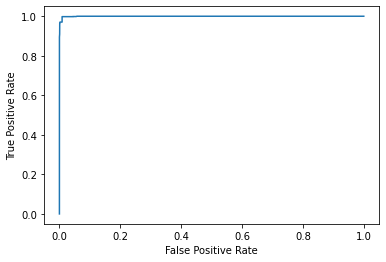

In [15]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

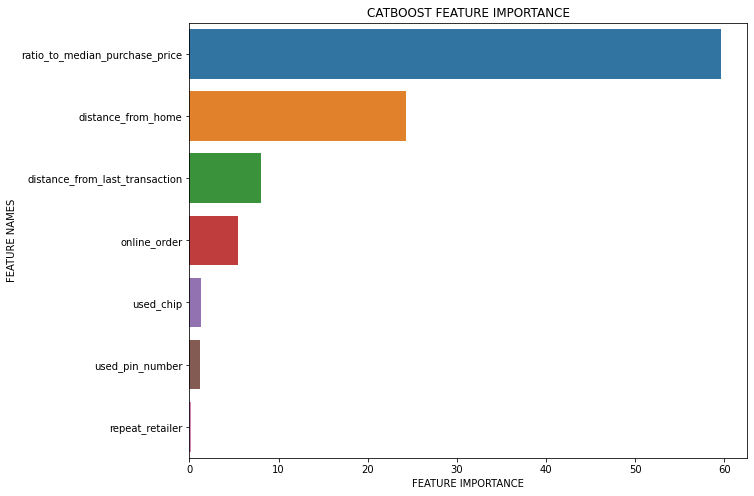

In [16]:
plot_feature_importance(model.get_feature_importance(),X.columns,'CATBOOST')